In [1]:
!pip install --upgrade pip
!pip install --upgrade Pillow

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import torch
import glob
import pandas as pd
import matplotlib.image as mpimg 
from PIL import Image

from torch.utils.data import Dataset
from rasterio.plot import show

In [2]:
def np_points(geo_points, geo_img):
  width, height = geo_img.shape
  left, bottom, right, top = geo_img.bounds

  if geo_img.crs.to_string() != geo_points.crs.to_string():
    geo_points = geo_points.to_crs(geo_img.crs.to_string())
  new_points = geo_points.geometry.translate(xoff=-left, yoff=-bottom, zoff=0.0)

  x_ratio = float(width) / (right - left)
  y_ratio = float(height) / (top - bottom)

  new_points = new_points.affine_transform([x_ratio, 0, 0, -y_ratio, 0, height])
  return np.array([[int(point.x), int(point.y)] for point in new_points.geometry.tolist()])

In [3]:
# ALL
DATA_PATH = 'data'
data_map = []
all_map = []

for tile in glob.glob(f'{DATA_PATH}/Tile_*'):
  shape_files = glob.glob(f'{tile}/*.shp')
  if len(shape_files) == 0:
    continue

  for planet_img in glob.glob(f'{tile}/Planet_*_FullScene/*.tif'):
    data_map.extend([planet_img, shape_files[0]])
    all_map.append(planet_img)
  
  for sentinel_img in glob.glob(f'{tile}/Sentinel_*/*.tif'):
    data_map.extend([sentinel_img, shape_files[0]])
    all_map.append(sentinel_img)

# print(data_map[1::2])

df_all = pd.DataFrame({'img_path': data_map[::2], 'shape_path': data_map[1::2]})

In [4]:
display(df_all)

,img_path,shape_path
0,data\Tile_C4\Planet_C4_FullScene\20170501_1456...,data\Tile_C4\GTD_BUF_TILE_C4.shp
1,data\Tile_C4\Planet_C4_FullScene\20190924_1519...,data\Tile_C4\GTD_BUF_TILE_C4.shp
2,data\Tile_C4\Planet_C4_FullScene\20190925_1436...,data\Tile_C4\GTD_BUF_TILE_C4.shp
3,data\Tile_C4\Planet_C4_FullScene\20191006_1433...,data\Tile_C4\GTD_BUF_TILE_C4.shp
4,data\Tile_C4\Planet_C4_FullScene\20200604_1352...,data\Tile_C4\GTD_BUF_TILE_C4.shp
...,...,...
160,data\Tile_G5\Sentinel_G5\S2B_MSIL1C_20190512T1...,data\Tile_G5\BUF_Tile_G5.shp
161,data\Tile_G5\Sentinel_G5\S2B_MSIL1C_20200110T1...,data\Tile_G5\BUF_Tile_G5.shp
162,data\Tile_G5\Sentinel_G5\S2B_MSIL1C_20200728T1...,data\Tile_G5\BUF_Tile_G5.shp
163,data\Tile_G5\Sentinel_G5\S2B_MSIL1C_20201202T1...,data\Tile_G5\BUF_Tile_G5.shp


In [6]:
# PLA
DATA_PATH = 'data'
pla_data_map = []
pla_map = []

for tile in glob.glob(f'{DATA_PATH}/Tile *'):
  shape_files = glob.glob(f'{tile}/*.shp')
  if len(shape_files) == 0:
    continue

  for planet_img in glob.glob(f'{tile}/Planet_*_FullScene/*.tif'):
    pla_data_map.extend([planet_img, shape_files[0]])
    pla_map.append(planet_img)
  
#   for sentinel_img in glob.glob(f'{tile}/Sentinel_*/*.tif'):
#     data_map.extend([sentinel_img, shape_files[0]])

# print(data_map[1::2])

df_pla = pd.DataFrame({'img_path': pla_data_map[::2], 'shape_path': pla_data_map[1::2]})

In [7]:
#SEN
DATA_PATH = 'data'
sen_data_map = []
sen_map = []

for tile in glob.glob(f'{DATA_PATH}/Tile *'):
  shape_files = glob.glob(f'{tile}/*.shp')
  if len(shape_files) == 0:
    continue
 
  for sentinel_img in glob.glob(f'{tile}/Sentinel_*/*.tif'):
    sen_data_map.extend([sentinel_img, shape_files[0]])
    sen_map.append(sentinel_img)

# print(data_map[1::2])

df_sen = pd.DataFrame({'img_path': sen_data_map[::2], 'shape_path': sen_data_map[1::2]})

In [8]:
display(df_sen.head())

,img_path,shape_path
0,data\Tile C4\Sentinel_C4\S2A_MSIL1C_20170716T1...,data\Tile C4\GTD_Trees_Locations_C4.shp
1,data\Tile C4\Sentinel_C4\S2A_MSIL1C_20190924T1...,data\Tile C4\GTD_Trees_Locations_C4.shp
2,data\Tile C4\Sentinel_C4\S2A_MSIL1C_20191123T1...,data\Tile C4\GTD_Trees_Locations_C4.shp
3,data\Tile C4\Sentinel_C4\S2A_MSIL1C_20210119T1...,data\Tile C4\GTD_Trees_Locations_C4.shp
4,data\Tile C4\Sentinel_C4\S2B_MSIL1C_20190512T1...,data\Tile C4\GTD_Trees_Locations_C4.shp


In [9]:
df_pla.head()

,img_path,shape_path
0,data\Tile C4\Planet_C4_FullScene\20170501_1456...,data\Tile C4\GTD_Trees_Locations_C4.shp
1,data\Tile C4\Planet_C4_FullScene\20190924_1519...,data\Tile C4\GTD_Trees_Locations_C4.shp
2,data\Tile C4\Planet_C4_FullScene\20190925_1436...,data\Tile C4\GTD_Trees_Locations_C4.shp
3,data\Tile C4\Planet_C4_FullScene\20191006_1433...,data\Tile C4\GTD_Trees_Locations_C4.shp
4,data\Tile C4\Planet_C4_FullScene\20200604_1352...,data\Tile C4\GTD_Trees_Locations_C4.shp


In [10]:
display(df_pla[['shape_path']])

,shape_path
0,data\Tile C4\GTD_Trees_Locations_C4.shp
1,data\Tile C4\GTD_Trees_Locations_C4.shp
2,data\Tile C4\GTD_Trees_Locations_C4.shp
3,data\Tile C4\GTD_Trees_Locations_C4.shp
4,data\Tile C4\GTD_Trees_Locations_C4.shp
...,...
92,data\Tile G5\GTD_Trees_Location_G5.shp
93,data\Tile G5\GTD_Trees_Location_G5.shp
94,data\Tile G5\GTD_Trees_Location_G5.shp
95,data\Tile G5\GTD_Trees_Location_G5.shp


In [11]:
RADIUS = 5
# dummy function
def create_circular_mask(radius=5):
  center = (radius, radius)
  Y, X = np.ogrid[:radius*2 + 1, :radius*2 + 1]
  dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

  mask = np.zeros((2*radius + 1, 2*radius + 1))
  mask[dist_from_center <= radius] = 1
  return mask

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


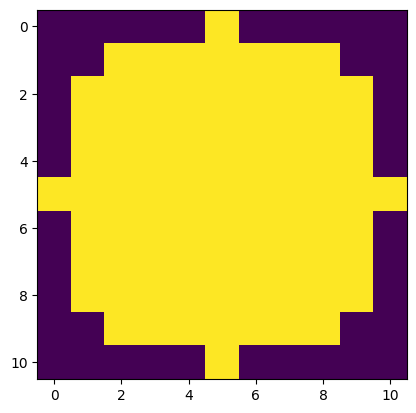

In [12]:
circle = create_circular_mask(RADIUS)
print(circle)
plt.imshow(circle)

In [31]:
RADIUS = 5 # unit? 

def create_mask(geo_points, geo_img):
    
    points = np_points(geo_points, geo_img).tolist()
    mask = np.zeros(geo_img.shape)
    #print(points)
    #print(mask)
    #print(mask.shape)
    XLESS = 0
    YLESS = 0
    counter = 0
    for x, y in points:
        #print(RADIUS)
        # print("in the for: ", mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1].shape)
        # print("before", circle)
        
        # row cutoff edge case / 2nd x val too large => 1st x val needs to be handled?
        #if mask[x - RADIUS : x + RADIUS + 1] > circle[]
        if ((y + RADIUS + 1) - 1668) > 0 : # row cutoff edge case /
            mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1] = circle[:-((y + RADIUS + 1) - 1668), :]
            #print("rad 2", (y + RADIUS + 1))
        elif ((x + RADIUS + 1) - 1668) > 0 : #col cutoff case (2nd val). Greater than 1668 size of image
            mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1] = circle[:, :-((x + RADIUS + 1)- 1668)]
            # print(x + RADIUS + 1)
        
        elif (y - RADIUS) < 0:
            mask[0: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1] = circle[0: y+RADIUS+1, :] #cut off circle
        
        elif (x - RADIUS) < 0:
            mask[y - RADIUS: y + RADIUS + 1, 0: x + RADIUS + 1] = circle[:, 0:x+RADIUS+1]
        elif ((y + RADIUS + 1) - 1668) <= 0:
            # print(mask.shape)
            # mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1] = circle
    
            # print("in the for. mask.shape: ", mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1].shape) #7,11
            # print("before circle", circle) # 11,11
            # print("((y + RADIUS + 1) - 1668) = ", ((y + RADIUS + 1) - 1668))
            # print("normal y", y - RADIUS, y + RADIUS + 1)
            # print( "normal x", x - RADIUS, x + RADIUS + 1)
            
            # ? - x y ordering
            if mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1].shape == (7,11) or mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1].shape == (9,11) or mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1].shape == (11,6) or mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1].shape == (11,10)  :
                print('mask', mask)
                if y-RADIUS == 501:
                     mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1] == circle[4:, :]
                if y-RADIUS == 499:
                    mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1] == circle[2:, :]
                if y-RADIUS == 453:
                    mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1] == circle[:, 5:]
                if y-RADIUS == 473:
                    mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1] == circle[:, 1:]
            else:
                mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1] == circle[:, :]    
                     #mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1] == circle[]
            # try:
            #     mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1] = circle
            # except Exception:
                #counter =+1
                # print("ERROR")
                # print(" in the TRY. mask.shape: ", mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1].shape)
        #print("circle", circle)
        #print(XLESS)

    # f, ax = plt.subplots(figsize=(40, 10))
    # plt.imshow(mask)
    # print('count', counter)
    return mask #, counter

In [5]:
import pprint

In [7]:
from rasterio import mask
from rasterio.plot import show

In [ ]:
# test 
ALL_PATH = 'data\\1668_tif_masks\\'
def test():
    # counter = 0
    for idx in df_all.index:
        # print(idx)
        tiff_name = all_map[idx]
        print(tiff_name)
        # print("split", tiff_name.split('\\')[-1])

        mask_save_name = tiff_name.split('\\')[-1] #.replace('.tif', '.png')
        # print(mask_save_name)
        # break
        tif_loc = df_all.iloc[idx, 0]
        print("works ", tif_loc)
        geo_img = rasterio.open(tif_loc, 'r') #loop thru length of dataframe instead and pass idx 
    
        # print(geo_img)
        image = geo_img.read() # -> array

        geo_points = gpd.read_file(df_all.iloc[idx, 1]) #-> geodataframe
        # print(geo_points)
        # print(image)
        #print(geo_points)
        #C:\Users\miche\Downloads\data\Tile D5\Planet_D5_FullScene
        #inf = ("data\20210213_150034-33_Mosaic_clip.tif")
        # print("works ", tif_loc)
        # print("inf ", inf)
        # geo_img = rasterio.open(image)
        # img = geo_img.read()
        #tmp_pts = gpd.read_file('data\BUFF_GTD_Trees_Location_C4.shp')
        #tmp_pts = gpd.read_file('data\\buffered_shp\\BUF_TILE_C4.shp')
        fst, _, _ = rasterio.mask.raster_geometry_mask(geo_img, geo_points['geometry'], crop=False)
        
        # mask = create_mask(geo_points, geo_img)
        # counter =+ s
        # mask = Image.fromarray(mask*255) # for visualization
        # # print(PNG_PATH + png_save_name) #For model - imread slice last channel
        # mask = mask.convert('RGB')
        # mask.save(ALL_PATH + mask_save_name)
        out_name = ALL_PATH + mask_save_name
        fst = np.logical_not(fst).astype('uint16') #inverting the inverted mask
        fst = fst*255

        with rasterio.open(tif_loc) as infile:
            in_prof = infile.profile
            in_prof['count'] = 3
            
            # print(f"\nprofile: {pprint.pformat(in_prof)}\n")
            with rasterio.open(out_name, 'w', **in_prof) as out:
                
                out.write(fst*255, 1)
        print("out", out_name)
        

    # print('COUNTER', counter)

test()

In [30]:
tif_loc = 'data\\1668_tif_masks\\S2B_MSIL1C_20201202T153619_N0209_R068_T17NRJ_20201202T184229_Visual_clip.tif'
#"C:\Users\miche\Downloads\data\test3\20170501_145608-07_Mosaic_Clip.tif"

with rasterio.open(tif_loc) as infile:
    in_prof = infile.profile
    # in_data = infile.meta
    in_data = infile.read()
    #print(in_data)
    print(np.unique(in_data, return_counts=True))
    print(in_data.shape)
    in_data = in_data[0, :, :]
    #print(in_data.shape)
    x = Image.fromarray(in_data.astype('int'))
    
    print(f"\nprofile: {pprint.pformat(in_prof)}\n")

(array([0], dtype=uint8), array([775716], dtype=int64))
(3, 508, 509)

profile: {'blockxsize': 256,
 'blockysize': 256,
 'compress': 'lzw',
 'count': 3,
 'crs': CRS.from_epsg(32617),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 508,
 'interleave': 'pixel',
 'nodata': None,
 'tiled': True,
 'transform': Affine(10.0, 0.0, 849940.0,
       0.0, -10.0, 854780.0),
 'width': 509}



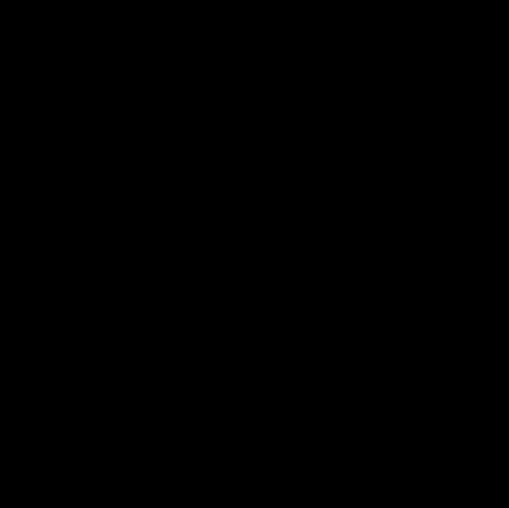

In [31]:
x

In [62]:
#BEFORE SLICE
tif_loc = 'data\\test\\20210213_150034-33_Mosaic_clip.tif'

with rasterio.open(tif_loc) as infile:
    in_prof = infile.profile
    # in_data = infile.meta
    in_data = infile.read()
    #print(in_data)
    print(np.unique(in_data, return_counts=True))
    print(in_data.shape)
    in_data = in_data[0, :, :]
    #print(in_data.shape)
    x = Image.fromarray(in_data.astype('int'))
    print(f"\nprofile: {pprint.pformat(in_prof)}\n")

(array([  0, 255], dtype=uint16), array([11128695,      201], dtype=int64))
(4, 1668, 1668)

profile: {'blockxsize': 128,
 'blockysize': 128,
 'compress': 'lzw',
 'count': 4,
 'crs': CRS.from_wkt('PROJCS["WGS_1984_UTM_Zone_18N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'driver': 'GTiff',
 'dtype': 'uint16',
 'height': 1668,
 'interleave': 'pixel',
 'nodata': None,
 'tiled': True,
 'transform': Affine(3.0, 0.0, 188013.0,
       0.0, -3.0, 869442.0),
 'width': 1668}



In [66]:
pth = 'data\\test1\\20191006_143354_Mosaic_Clip.tif'
#"C:\Users\miche\Downloads\data\pngs\Tile_D5\Planet_D5\20191006_143354_Mosaic_Clip.png"

with rasterio.open(pth) as infile:
    in_prof = infile.profile
    in_data = infile.read()
    print(np.unique(in_data, return_counts=True))
    print(in_data.shape)
    print(f"\nprofile: {pprint.pformat(in_prof)}\n")
    print(np.unique(in_data, return_counts=True))
    print(in_data.shape)

# pad with 62 each side
#1536 reisize
# save both sat image and mak as 1536

(array([0], dtype=uint16), array([2782224], dtype=int64))
(1, 1668, 1668)

profile: {'blockxsize': 128,
 'blockysize': 128,
 'compress': 'lzw',
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS_1984_UTM_Zone_18N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'driver': 'GTiff',
 'dtype': 'uint16',
 'height': 1668,
 'interleave': 'band',
 'nodata': None,
 'tiled': True,
 'transform': Affine(3.0, 0.0, 183012.0,
       0.0, -3.0, 874443.0),
 'width': 1668}

(array([0], dtype=uint16), array([2782224], dtype=int64))
(1, 1668, 1668)


In [68]:
from PIL import Image

im = Image.open('data\\pngs\\Tile_D5\\Planet_D5\\20191006_143354_Mosaic_Clip.png')
im = np.array(im)
print(np.unique(im[:, :, 0], return_counts=True))
print(im.shape)

(array([  0, 255], dtype=uint8), array([2782198,      26], dtype=int64))
(1668, 1668, 3)


In [59]:
#convert tifs into 3 bands
ALL_PATH = 'data\\test_count0\\'
def generate_all():
    counter = 0
    for idx in df_all.index:
        # print(idx)
        tiff_name = all_map[idx]
        print(tiff_name)
        # print("split", tiff_name.split('\\')[-1])

        mask_save_name = tiff_name.split('\\')[-1] #.replace('.tif', '.png')
        # print(mask_save_name)
        # break
        tif_loc = df_all.iloc[idx, 0]
        geo_img = rasterio.open(tif_loc) #loop thru length of dataframe instead and pass idx 
    
        # print(geo_img)
        image = geo_img.read()

        geo_points = gpd.read_file(df_all.iloc[idx, 1])
        # print(geo_points)
        mask = create_mask(geo_points, geo_img)
        mask = mask*255
        print(np.unique(mask*255), mask.shape)
        
        #print(mask*255)
        # break
        # counter =+ s
        # mask = Image.fromarray(mask*255) # for visualization
        # # print(PNG_PATH + png_save_name) #For model - imread slice last channel
        # mask = mask.convert('RGB')
        # mask.save(ALL_PATH + mask_save_name)
        out_name = ALL_PATH + mask_save_name
            #in_data = in_data[0, :, :]
    
        with rasterio.open(tif_loc) as infile:
            in_prof = infile.profile
            in_prof['count'] = 0
               
            # print(f"\nprofile: {pprint.pformat(in_prof)}\n")
            with rasterio.open(out_name, 'w', **in_prof) as out:
                
                out.write(mask, 1)

    # print('COUNTER', counter)

generate_all()

data\Tile C4\Planet_C4_FullScene\20170501_145608-07_Mosaic_Clip.tif
[0.] (1668, 1668)


RasterioIOError: data\test_count0\20170501_145608-07_Mosaic_Clip.tif: Attempt to create 1668x1668x0 TIFF file, but width, height and bandsmust be positive.

In [16]:
# #saving without crs info
# ALL_PATH = 'data\\uncut_tif_masks_all\\'
# def generate_all():
#     counter = 0
#     for idx in df_all.index:
#         # print(idx)
#         tiff_name = all_map[idx]
#         print(tiff_name)
#         # print("split", tiff_name.split('\\')[-1])

#         mask_save_name = tiff_name.split('\\')[-1] #.replace('.tif', '.png')
#         # print(mask_save_name)
#         # break
#         geo_img = rasterio.open(df_all.iloc[idx, 0]) #loop thru length of dataframe instead and pass idx 
    
#         # print(geo_img)
#         image = geo_img.read()

#         geo_points = gpd.read_file(df_all.iloc[idx, 1])
#         # print(geo_points)
#         mask, s = create_mask(geo_points, geo_img)
#         counter =+ s
#         mask = Image.fromarray(mask*255) # for visualization
#         # print(PNG_PATH + png_save_name) #For model - imread slice last channel
#         mask = mask.convert('RGB')
#         mask.save(ALL_PATH + mask_save_name)
#     print('COUNTER', counter)

# generate_all()

data\Tile C4\Planet_C4_FullScene\20170501_145608-07_Mosaic_Clip.tif
(1668, 1668)
in the for. mask.shape:  (11, 11)
before circle [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
((y + RADIUS + 1) - 1668) =  -95
normal y 1562 1573
normal x 335 346
ERROR
 in the TRY. mask.shape:  (11, 11)
(1668, 1668)
in the for. mask.shape:  (11, 11)
before circle [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1

In [ ]:
TIF_PATH = 'data\\uncut_tif_masks_pla\\'
def generate_pla():
    
    for idx in df_pla.index:
        print(idx)
        tiff_name = pla_map[idx]
        # print(tiff_name)
        print("split", tiff_name.split('\\')[-1])

        mask_save_name = tiff_name.split('\\')[-1] #.replace('.tif', '.png')
        print(mask_save_name)
        # break
        geo_img = rasterio.open(df_pla.iloc[idx, 0]) #loop thru length of dataframe instead and pass idx 
    
        print(geo_img)
        image = geo_img.read()

        geo_points = gpd.read_file(df_pla.iloc[idx, 1])
        print(geo_points)
        mask = create_mask(geo_points, geo_img)
        
        mask = Image.fromarray(mask*255) # for visualization
        # print(PNG_PATH + png_save_name) #For model - imread slice last channel
        mask = mask.convert('RGB')
        mask.save(TIF_PATH + mask_save_name)

#     return image, mask

# generate_pla() # ? - why are only 83 returned?!??!?!

In [ ]:
SEN_PATH = 'data\\uncut_tif_masks_sen\\'
def generate_sen():
    
    for idx in df_sen.index:
        # print(idx)
        tiff_name = sen_map[idx]
        # print(tiff_name)
        # print("split", tiff_name.split('\\')[-1])

        mask_save_name = tiff_name.split('\\')[-1] #.replace('.tif', '.png')
        # print(mask_save_name)
        # break
        geo_img = rasterio.open(df_sen.iloc[idx, 0]) #loop thru length of dataframe instead and pass idx 
    
        # print(geo_img)
        image = geo_img.read()

        geo_points = gpd.read_file(df_sen.iloc[idx, 1])
        # print(geo_points)
        mask = create_mask(geo_points, geo_img)
        
        mask = Image.fromarray(mask*255) # for visualization
        # print(PNG_PATH + png_save_name) #For model - imread slice last channel
        mask = mask.convert('RGB')
        mask.save(SEN_PATH + mask_save_name)
#     return image, mask

# generate_sen() # ?!??!?!